# PART 1: 

# HOW TO CLEAN DATA WITH PYTHON
# Cleaning US Census Data
You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms?

# Inspect the Data!
# 1.The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?

# 2.It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them?

Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [1]:
import pandas as pd
import numpy as np

In [10]:
from glob import glob

filenames=glob('FemalePop*.csv')

In [11]:
us_census=pd.concat((pd.read_csv(f) for f in filenames), ignore_index= True)
us_census

Unnamed: 0                 State  TotalPop             Hispanic  \
0            0               Alabama   4830620  3.7516156462584975%   
1            1                Alaska    733375   5.909580838323351%   
2            2               Arizona   6641928  29.565921052631502%   
3            3              Arkansas   2958208   6.215474452554738%   
4            4            California  38421464  37.291874687968054%   
5            5              Colorado   5278906   20.78438003220608%   
6            0              Colorado   5278906   20.78438003220608%   
7            1           Connecticut   3593222  15.604830917874388%   
8            2              Delaware    926454    8.82476635514019%   
9            3  District of Columbia    647484   9.165921787709499%   
10           4               Florida  19645772    21.3385426653884%   
11           5               Georgia  10006693   8.418242207460397%   
12           0               Georgia  10006693   8.418242207460397%   
13           1                Hawaii   1406299   9.186708860759486%   
14           2                 Idaho   1616547  11.505369127516781%   
15           3              Illinois  12873761  15.601733547351516%   
16           4               Indiana   6568645   6.536744186046501%   
17           5                  Iowa   3093526    5.30364520048603%   
18           0                  Iowa   3093526    5.30364520048603%   
19           1                Kansas   2892987  11.644342105263148%   
20           2              Kentucky   4397353   3.222993688007212%   
21           3             Louisiana   4625253   4.866489361702128%   
22           4                 Maine   1329100  1.4319088319088318%   
23           5              Maryland   5930538    8.47249820014399%   
24           0              Maryland   5930538    8.47249820014399%   
25           1         Massachusetts   6705586  11.461065573770476%   
26           2              Michigan   9900571   4.634992732558134%   
27           3             Minnesota   5419171   5.152923538230896%   
28           4           Mississippi   2988081   2.842401215805473%   
29           5              Missouri   6045448   4.037247838616718%   
30           0              Missouri   6045448   4.037247838616718%   
31           1               Montana   1014699  3.2688888888888896%   
32           2              Nebraska   1869365   9.203759398496235%   
33           3                Nevada   2798636  27.100883652430046%   
34           4         New Hampshire   1324201  3.3219178082191796%   
35           5            New Jersey   8904413   18.74950049950049%   
36           0            New Jersey   8904413   18.74950049950049%   
37           1            New Mexico   2084117   45.28293172690762%   
38           2              New York  19673174  17.241424747786684%   
39           3        North Carolina   9845333   8.464762782128062%   
40           4          North Dakota    721640   2.832682926829267%   
41           5                  Ohio  11575977  3.6720843250595037%   
42           0                  Ohio  11575977  3.6720843250595037%   
43           1              Oklahoma   3849733    10.0799043062201%   
44           2                Oregon   3939233  11.441212121212132%   
45           3          Pennsylvania  12779559   6.128013741411624%   
46           4           Puerto Rico   3583073   98.89357384441935%   
47           5          Rhode Island   1053661  13.356666666666678%   
48           0          Rhode Island   1053661  13.356666666666678%   
49           1        South Carolina   4777576   5.056684981684991%   
50           2          South Dakota    843190  3.2396396396396376%   
51           3             Tennessee   6499615   4.720026972353339%   
52           4                 Texas  26538614   38.04673809068304%   
53           5                  Utah   2903379  13.468376068376063%   
54           0                  Utah   2903379  13.468376068376063%   
55           1              

# 3. Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?


In [12]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [13]:
us_census.columns.dtype

dtype('O')

# 4. Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

In [14]:
us_census.head()

Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
0  0.03435374149659865%  $43296.35860306644    2341093M_2489527F  
1   1.0586826347305378%  $70354.74390243902      384160M_349215F  
2  0.16763157894736833%  $54207.82095490716    3299088M_3342840F  
3  0.14686131386861315%  $41935.63396778917    1451913M_1506295F  
4  0.35141038442336353%  $67264.78230266465  19087135M_19334329F

In [15]:
us_census.drop(columns = ['Unnamed: 0'], inplace = True)

In [16]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

# 5 .Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.

Split the column into those two new columns using str.split and separating out those results.

In [17]:
us_census[['MenCol','WomenCol']]=us_census.GenderPop.str.split("_", expand=True,)

In [18]:
us_census.head()

State  TotalPop             Hispanic                White  \
0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop     MenCol  \
0  0.03435374149659865%  $43296.35860306644    2341093M_2489527F   2341093M   
1   1.0586826347305378%  $70354.74390243902      384160M_349215F    384160M   
2  0.16763157894736833%  $54207.82095490716    3299088M_3342840F   3299088M   
3  0.14686131386861315%  $41935.63396778917    1451913M_1506295F   1451913M   
4  0.35141038442336353%  $67264.78230266465  19087135M_19334329F  19087135M   

    WomenCol  
0   2489527F  
1    349215F  
2   3342840F  
3   1506295F  
4  19334329F

In [19]:
us_census=us_census.drop(columns = ['GenderPop'] , axis = 1 )
us_census.head()

State  TotalPop             Hispanic                White  \
0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income     MenCol   WomenCol  
0  0.03435374149659865%  $43296.35860306644   2341093M   2489527F  
1   1.0586826347305378%  $70354.74390243902    384160M    349215F  
2  0.16763157894736833%  $54207.82095490716   3299088M   3342840F  
3  0.14686131386861315%  $41935.63396778917   1451913M   1506295F  
4  0.35141038442336353%  $67264.78230266465  19087135M  19334329F

# 6.Convert both of the columns into numerical datatypes.

There is still an M or an F character in each entry! We should remove those before we convert.

In [20]:
us_census['MenCol']=pd.to_numeric(us_census['MenCol'].replace({'M':''}, regex=True ))
us_census.head()

State  TotalPop             Hispanic                White  \
0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income    MenCol   WomenCol  
0  0.03435374149659865%  $43296.35860306644   2341093   2489527F  
1   1.0586826347305378%  $70354.74390243902    384160    349215F  
2  0.16763157894736833%  $54207.82095490716   3299088   3342840F  
3  0.14686131386861315%  $41935.63396778917   1451913   1506295F  
4  0.35141038442336353%  $67264.78230266465  19087135  19334329F

In [21]:
us_census['WomenCol']=pd.to_numeric(us_census['WomenCol'].replace({'F':''}, regex=True ))
us_census.head()

State  TotalPop             Hispanic                White  \
0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income    MenCol    WomenCol  
0  0.03435374149659865%  $43296.35860306644   2341093   2489527.0  
1   1.0586826347305378%  $70354.74390243902    384160    349215.0  
2  0.16763157894736833%  $54207.82095490716   3299088   3342840.0  
3  0.14686131386861315%  $41935.63396778917   1451913   1506295.0  
4  0.35141038442336353%  $67264.78230266465  19087135  19334329.0

# 7. Use regex to turn the Income column into a format that is ready for conversion into a numerical type.


In [22]:
us_census['Income']=pd.to_numeric(us_census['Income'].replace({'\$':''}, regex=True ))

In [23]:
#the_Incom_col=pd.to_numeric(us_census['Income'].replace({'\$':''}, regex=True ))
#us_census['Income']=us_census.Income.replace({'\$':''}, regex=True )
#us_census['Income']=us_census.Income.replace({'\%':''}, regex=True )
us_census.head()

State  TotalPop             Hispanic                White  \
0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific        Income    MenCol    WomenCol  
0  0.03435374149659865%  43296.358603   2341093   2489527.0  
1   1.0586826347305378%  70354.743902    384160    349215.0  
2  0.16763157894736833%  54207.820955   3299088   3342840.0  
3  0.14686131386861315%  41935.633968   1451913   1506295.0  
4  0.35141038442336353%  67264.782303  19087135  19334329.0

In [24]:
us_census=us_census.replace('%','',regex=True)

In [25]:
us_census.head()

State  TotalPop            Hispanic               White  \
0     Alabama   4830620  3.7516156462584975     61.878656462585   
1      Alaska    733375   5.909580838323351  60.910179640718574   
2     Arizona   6641928  29.565921052631502  57.120000000000026   
3    Arkansas   2958208   6.215474452554738   71.13781021897813   
4  California  38421464  37.291874687968054   40.21578881677474   

                Black               Native               Asian  \
0   31.25297619047618   0.4532312925170065  1.0502551020408146   
1  2.8485029940119775    16.39101796407186   5.450299401197604   
2  3.8509868421052658     4.35506578947368   2.876578947368419   
3  18.968759124087573   0.5229197080291965  1.1423357664233578   
4   5.677396405391911  0.40529206190713685  13.052234148776776   

               Pacific        Income    MenCol    WomenCol  
0  0.03435374149659865  43296.358603   2341093   2489527.0  
1   1.0586826347305378  70354.743902    384160    349215.0  
2  0.16763157894736833  54207.820955   3299088   3342840.0  
3  0.14686131386861315  41935.633968   1451913   1506295.0  
4  0.35141038442336353  67264.782303  19087135  19334329.0

In [26]:
us_census.loc[ :, 'Hispanic': 'Income']=round(us_census.loc[ :, 'Hispanic':'Income'].apply(pd.to_numeric),2)

In [27]:
us_census.head()

State  TotalPop  Hispanic  White  Black  Native  Asian  Pacific  \
0     Alabama   4830620      3.75  61.88  31.25    0.45   1.05     0.03   
1      Alaska    733375      5.91  60.91   2.85   16.39   5.45     1.06   
2     Arizona   6641928     29.57  57.12   3.85    4.36   2.88     0.17   
3    Arkansas   2958208      6.22  71.14  18.97    0.52   1.14     0.15   
4  California  38421464     37.29  40.22   5.68    0.41  13.05     0.35   

     Income    MenCol    WomenCol  
0  43296.36   2341093   2489527.0  
1  70354.74    384160    349215.0  
2  54207.82   3299088   3342840.0  
3  41935.63   1451913   1506295.0  
4  67264.78  19087135  19334329.0

# 8. Did you get an error? These monstrous csv files probably have nan values in them! 
 a) Print out your column with the number of women per state to see.  
 b) We can fill in those nans by using pandas’ .fillna() function. 
 c) You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.  
 d)Print out the Women column after filling the nan values to see if it worked!


In [28]:
us_census

State  TotalPop  Hispanic  White  Black  Native  Asian  \
0                Alabama   4830620      3.75  61.88  31.25    0.45   1.05   
1                 Alaska    733375      5.91  60.91   2.85   16.39   5.45   
2                Arizona   6641928     29.57  57.12   3.85    4.36   2.88   
3               Arkansas   2958208      6.22  71.14  18.97    0.52   1.14   
4             California  38421464     37.29  40.22   5.68    0.41  13.05   
5               Colorado   5278906     20.78  69.90   3.55    0.57   2.66   
6               Colorado   5278906     20.78  69.90   3.55    0.57   2.66   
7            Connecticut   3593222     15.60  67.68  10.35    0.13   4.02   
8               Delaware    926454      8.82  64.63  20.74    0.26   3.27   
9   District of Columbia    647484      9.17  33.10  51.78    0.20   3.38   
10               Florida  19645772     21.34  59.08  15.17    0.21   2.28   
11               Georgia  10006693      8.42  54.29  32.09    0.19   3.10   
12               Georgia  10006693      8.42  54.29  32.09    0.19   3.10   
13                Hawaii   1406299      9.19  25.03   2.05    0.14  36.59   
14                 Idaho   1616547     11.51  83.14   0.57    1.47   1.14   
15              Illinois  12873761     15.60  60.86  17.11    0.12   4.48   
16               Indiana   6568645      6.54  78.43  11.19    0.19   1.58   
17                  Iowa   3093526      5.30  87.72   3.26    0.29   1.70   
18                  Iowa   3093526      5.30  87.72   3.26    0.29   1.70   
19                Kansas   2892987     11.64  75.96   6.57    0.73   2.33   
20              Kentucky   4397353      3.22  85.23   8.27    0.17   1.13   
21             Louisiana   4625253      4.87  54.98  36.33    0.48   1.67   
22                 Maine   1329100      1.43  93.71   1.13    0.79   0.97   
23              Maryland   5930538      8.47  52.68  30.68    0.20   5.33   
24              Maryland   5930538      8.47  52.68  30.68    0.20   5.33   
25         Massachusetts   6705586     11.46  73.04   6.83    0.13   5.84   
26              Michigan   9900571      4.63  72.38  17.63    0.48   2.42   
27             Minnesota   5419171      5.15  81.43   5.66    1.07   4.16   
28           Mississippi   2988081      2.84  53.29  41.49    0.39   0.88   
29              Missouri   6045448      4.04  77.51  14.12    0.36   1.62   
30              Missouri   6045448      4.04  77.51  14.12    0.36   1.62   
31               Montana   1014699      3.27  86.42   0.43    7.06   0.57   
32              Nebraska   1869365      9.20  81.14   4.96    0.86   1.86   
33                Nevada   2798636     27.10  53.24   7.74    1.09   7.10   
34         New Hampshire   1324201      3.32  91.32   1.23    0.14   2.19   
35            New Jersey   8904413     18.75  56.49  14.39    0.12   8.16   
36            New Jersey   8904413     18.75  56.49  14.39    0.12   8.16   
37            New Mexico   2084117     45.28  40.70   1.76    9.25   1.23   
38              New York  19673174     17.24  56.47  15.67    0.32   7.90   
39        North Carolina   9845333      8.46  64.60  21.40    1.09   2.32   
40          North Dakota    721640      2.83  87.45   1.28    5.65   0.96   
41                  Ohio  11575977      3.67  75.90  16.21    0.17   1.62   
42                  Ohio  11575977      3.67  75.90  16.21    0.17   1.62   
43              Oklahoma   3849733     10.08  66.06   8.31    6.72   1.80   
44                Oregon   3939233     11.44  78.40   1.73    1.00   3.59   
45          Pennsylvania  12779559      6.13  77.38  11.63    0.12   2.80   
46           Puerto Rico   3583073     98.89   0.77   0.09    0.00   0.08   
47          Rhode Island   1053661     13.36  74.33   5.68    0.35   3.25   
48          Rhode Island   1053661     13.36  74.33   5.68    0.35   3.25   
49        South Carolina   4777576      5.06  62.89  28.75    0.29   1.25   
50          South Dakota    843190      3.24  82.50   1.42    9.42   1.02   
51             

In [29]:
# us_census['WomenCol']=us_census['WomenCol'].astype(int) 
# the datatype of "WomenCol" cannot be changed into integer because of this NAN values. As error Occurred is
#ValueError: Cannot convert non-finite values (NA or inf) to integer

In [30]:
# Now i Dropped the " WomenCol" and Fill again this Column with "totalPop - MenCol Values"
us_census= us_census.drop(columns = ['WomenCol'] , axis=1)

In [31]:
us_census['WomenCol']=us_census['TotalPop']-us_census['MenCol']
us_census

State  TotalPop  Hispanic  White  Black  Native  Asian  \
0                Alabama   4830620      3.75  61.88  31.25    0.45   1.05   
1                 Alaska    733375      5.91  60.91   2.85   16.39   5.45   
2                Arizona   6641928     29.57  57.12   3.85    4.36   2.88   
3               Arkansas   2958208      6.22  71.14  18.97    0.52   1.14   
4             California  38421464     37.29  40.22   5.68    0.41  13.05   
5               Colorado   5278906     20.78  69.90   3.55    0.57   2.66   
6               Colorado   5278906     20.78  69.90   3.55    0.57   2.66   
7            Connecticut   3593222     15.60  67.68  10.35    0.13   4.02   
8               Delaware    926454      8.82  64.63  20.74    0.26   3.27   
9   District of Columbia    647484      9.17  33.10  51.78    0.20   3.38   
10               Florida  19645772     21.34  59.08  15.17    0.21   2.28   
11               Georgia  10006693      8.42  54.29  32.09    0.19   3.10   
12               Georgia  10006693      8.42  54.29  32.09    0.19   3.10   
13                Hawaii   1406299      9.19  25.03   2.05    0.14  36.59   
14                 Idaho   1616547     11.51  83.14   0.57    1.47   1.14   
15              Illinois  12873761     15.60  60.86  17.11    0.12   4.48   
16               Indiana   6568645      6.54  78.43  11.19    0.19   1.58   
17                  Iowa   3093526      5.30  87.72   3.26    0.29   1.70   
18                  Iowa   3093526      5.30  87.72   3.26    0.29   1.70   
19                Kansas   2892987     11.64  75.96   6.57    0.73   2.33   
20              Kentucky   4397353      3.22  85.23   8.27    0.17   1.13   
21             Louisiana   4625253      4.87  54.98  36.33    0.48   1.67   
22                 Maine   1329100      1.43  93.71   1.13    0.79   0.97   
23              Maryland   5930538      8.47  52.68  30.68    0.20   5.33   
24              Maryland   5930538      8.47  52.68  30.68    0.20   5.33   
25         Massachusetts   6705586     11.46  73.04   6.83    0.13   5.84   
26              Michigan   9900571      4.63  72.38  17.63    0.48   2.42   
27             Minnesota   5419171      5.15  81.43   5.66    1.07   4.16   
28           Mississippi   2988081      2.84  53.29  41.49    0.39   0.88   
29              Missouri   6045448      4.04  77.51  14.12    0.36   1.62   
30              Missouri   6045448      4.04  77.51  14.12    0.36   1.62   
31               Montana   1014699      3.27  86.42   0.43    7.06   0.57   
32              Nebraska   1869365      9.20  81.14   4.96    0.86   1.86   
33                Nevada   2798636     27.10  53.24   7.74    1.09   7.10   
34         New Hampshire   1324201      3.32  91.32   1.23    0.14   2.19   
35            New Jersey   8904413     18.75  56.49  14.39    0.12   8.16   
36            New Jersey   8904413     18.75  56.49  14.39    0.12   8.16   
37            New Mexico   2084117     45.28  40.70   1.76    9.25   1.23   
38              New York  19673174     17.24  56.47  15.67    0.32   7.90   
39        North Carolina   9845333      8.46  64.60  21.40    1.09   2.32   
40          North Dakota    721640      2.83  87.45   1.28    5.65   0.96   
41                  Ohio  11575977      3.67  75.90  16.21    0.17   1.62   
42                  Ohio  11575977      3.67  75.90  16.21    0.17   1.62   
43              Oklahoma   3849733     10.08  66.06   8.31    6.72   1.80   
44                Oregon   3939233     11.44  78.40   1.73    1.00   3.59   
45          Pennsylvania  12779559      6.13  77.38  11.63    0.12   2.80   
46           Puerto Rico   3583073     98.89   0.77   0.09    0.00   0.08   
47          Rhode Island   1053661     13.36  74.33   5.68    0.35   3.25   
48          Rhode Island   1053661     13.36  74.33   5.68    0.35   3.25   
49        South Carolina   4777576      5.06  62.89  28.75    0.29   1.25   
50          South Dakota    843190      3.24  82.50   1.42    9.42   1.02   
51             

In [32]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
MenCol        int64
WomenCol      int64
dtype: object

# 9. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!

Use matplotlib to make a scatterplot!

plt.scatter(the_women_column, the_income_column) 
Remember to call plt.show() to see the graph!

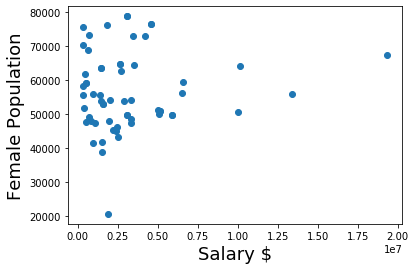

In [33]:
import matplotlib.pyplot as plt
plt.scatter(us_census['WomenCol'],us_census['Income'])
plt.xlabel('Salary $', fontsize=18)
plt.ylabel('Female Population', fontsize=18)
plt.show()

# 10. We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.

In [34]:
us_census.duplicated().any()

True

# 11. Drop those duplicates using the .drop_duplicates() function.

In [35]:
us_census.drop_duplicates(inplace=True)

# 12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

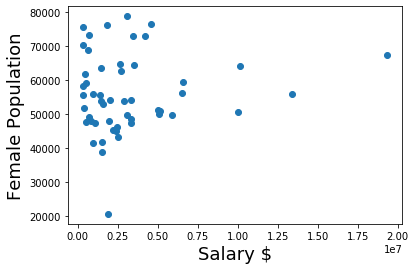

In [36]:
plt.scatter(us_census['WomenCol'],us_census['Income'])
plt.xlabel('Salary $', fontsize=18)
plt.ylabel('Female Population', fontsize=18)
plt.show()

# 13.Try to make a histogram for each one! You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

In [37]:
us_census.duplicated().any()

False

In [38]:
histo=round(us_census.loc[ :,'Hispanic':'Pacific'].apply(lambda x:x*us_census['TotalPop']/100))

In [39]:
histo

Hispanic       White      Black    Native      Asian   Pacific
0     181148.0   2989188.0  1509569.0   21738.0    50722.0    1449.0
1      43342.0    446699.0    20901.0  120200.0    39969.0    7774.0
2    1964018.0   3793869.0   255714.0  289588.0   191288.0   11291.0
3     184001.0   2104469.0   561172.0   15383.0    33724.0    4437.0
4   14327364.0  15453113.0  2182339.0  157528.0  5014001.0  134475.0
5    1096957.0   3689955.0   187401.0   30090.0   140419.0       NaN
7     560543.0   2431893.0   371898.0    4671.0   144448.0     719.0
8      81713.0    598767.0   192147.0    2409.0    30295.0       NaN
9      59374.0    214317.0   335267.0    1295.0    21885.0     194.0
10   4192408.0  11606722.0  2980264.0   41256.0   447924.0    9823.0
11    842564.0   5432634.0  3211148.0   19013.0   310207.0    5003.0
13    129239.0    351997.0    28829.0    1969.0   514565.0  123192.0
14    186065.0   1343997.0     9214.0   23763.0    18429.0    2102.0
15   2008307.0   7834971.0  2202701.0   15449.0   576744.0    2575.0
16    429589.0   5151788.0   735031.0   12480.0   103785.0    1971.0
17    163957.0   2713641.0   100849.0    8971.0    52590.0    1856.0
19    336744.0   2197513.0   190069.0   21119.0    67407.0       NaN
20    141595.0   3747864.0   363661.0    7476.0    49690.0    2199.0
21    225250.0   2542964.0  1680354.0   22201.0    77242.0    1850.0
22     19006.0   1245500.0    15019.0   10500.0    12892.0     266.0
23    502317.0   3124207.0  1819489.0   11861.0   316098.0    2372.0
25    768460.0   4897760.0   457992.0    8717.0   391606.0    1341.0
26    458396.0   7166033.0  1745471.0   47523.0   239594.0    1980.0
27    279087.0   4412831.0   306725.0   57985.0   225438.0    1626.0
28     84862.0   1592348.0  1239755.0   11654.0    26295.0     598.0
29    244236.0   4685827.0   853617.0   21764.0    97936.0    6045.0
31     33181.0    876903.0     4363.0   71638.0     5784.0     710.0
32    171982.0   1516803.0    92721.0   16077.0    34770.0    1122.0
33    758430.0   1489994.0   216614.0   30505.0   198703.0   15952.0
34     43963.0   1209260.0    16288.0    1854.0    29000.0     265.0
35   1669577.0   5030103.0  1281345.0   10685.0   726600.0    2671.0
37    943688.0    848236.0    36680.0  192781.0    25635.0     834.0
38   3391655.0  11109441.0  3082786.0   62954.0  1554181.0    3935.0
39    832915.0   6360085.0  2106901.0  107314.0   228412.0    4923.0
40     20422.0    631074.0     9237.0   40773.0     6928.0       NaN
41    424838.0   8786167.0  1876466.0   19679.0   187531.0    2315.0
43    388053.0   2543134.0   319913.0  258702.0    69295.0    4235.0
44    450648.0   3088359.0    68149.0   39392.0   141418.0   13787.0
45    783387.0   9888823.0  1486263.0   15335.0   357828.0    2556.0
46   3543301.0     27590.0     3225.0       0.0     2866.0       0.0
47    140769.0    783186.0    59848.0    3688.0    34244.0     421.0
49    241745.0   3004618.0  1373553.0   13855.0    59720.0    2389.0
50     27319.0    695632.0    11973.0   79428.0     8601.0     337.0
51    306782.0   4776567.0  1188130.0   14949.0    91645.0    2600.0
52  10097943.0  11860107.0  3091749.0   69000.0   973967.0   18577.0
53    391085.0   2305573.0    29614.0   31356.0    63874.0   24098.0
55     10088.0    588882.0     6141.0    1880.0     7770.0     188.0
56    661356.0   5223970.0  1666188.0   17339.0   450812.0    4954.0
57    778181.0   5032328.0   236109.0   98495.0   490380.0   42611.0
58     23883.0   1706639.0    67762.0    2777.0    12590.0     555.0
59    383573.0   4585655.0   470854.0   54550.0   137811.0    1148.0

In [40]:
histo.isnull().any()

Hispanic    False
White       False
Black       False
Native      False
Asian       False
Pacific      True
dtype: bool

In [41]:
histo.fillna(method='bfill',inplace=True)
histo.astype(int)

Hispanic     White    Black  Native    Asian  Pacific
0     181148   2989188  1509569   21738    50722     1449
1      43342    446699    20901  120200    39969     7774
2    1964018   3793869   255714  289588   191288    11291
3     184001   2104469   561172   15383    33724     4437
4   14327364  15453113  2182339  157528  5014001   134475
5    1096957   3689955   187401   30090   140419      719
7     560543   2431893   371898    4671   144448      719
8      81713    598767   192147    2409    30295      194
9      59374    214317   335267    1295    21885      194
10   4192408  11606722  2980264   41256   447924     9823
11    842564   5432634  3211148   19013   310207     5003
13    129239    351997    28829    1969   514565   123192
14    186065   1343997     9214   23763    18429     2102
15   2008307   7834971  2202701   15449   576744     2575
16    429589   5151788   735031   12480   103785     1971
17    163957   2713641   100849    8971    52590     1856
19    336744   2197513   190069   21119    67407     2199
20    141595   3747864   363661    7476    49690     2199
21    225250   2542964  1680354   22201    77242     1850
22     19006   1245500    15019   10500    12892      266
23    502317   3124207  1819489   11861   316098     2372
25    768460   4897760   457992    8717   391606     1341
26    458396   7166033  1745471   47523   239594     1980
27    279087   4412831   306725   57985   225438     1626
28     84862   1592348  1239755   11654    26295      598
29    244236   4685827   853617   21764    97936     6045
31     33181    876903     4363   71638     5784      710
32    171982   1516803    92721   16077    34770     1122
33    758430   1489994   216614   30505   198703    15952
34     43963   1209260    16288    1854    29000      265
35   1669577   5030103  1281345   10685   726600     2671
37    943688    848236    36680  192781    25635      834
38   3391655  11109441  3082786   62954  1554181     3935
39    832915   6360085  2106901  107314   228412     4923
40     20422    631074     9237   40773     6928     2315
41    424838   8786167  1876466   19679   187531     2315
43    388053   2543134   319913  258702    69295     4235
44    450648   3088359    68149   39392   141418    13787
45    783387   9888823  1486263   15335   357828     2556
46   3543301     27590     3225       0     2866        0
47    140769    783186    59848    3688    34244      421
49    241745   3004618  1373553   13855    59720     2389
50     27319    695632    11973   79428     8601      337
51    306782   4776567  1188130   14949    91645     2600
52  10097943  11860107  3091749   69000   973967    18577
53    391085   2305573    29614   31356    63874    24098
55     10088    588882     6141    1880     7770      188
56    661356   5223970  1666188   17339   450812     4954
57    778181   5032328   236109   98495   490380    42611
58     23883   1706639    67762    2777    12590      555
59    383573   4585655   470854   54550   137811     1148

# 14.Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017EC4A2A8C8>]],
      dtype=object)

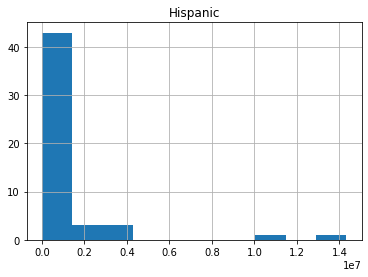

In [42]:
histo.hist(column='Hispanic')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017EC4ACF7C8>]],
      dtype=object)

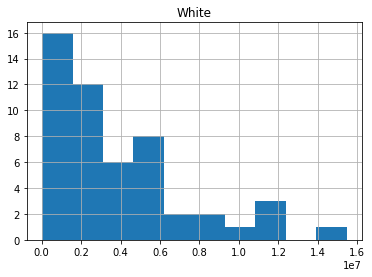

In [43]:
histo.hist(column='White')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017EC4B66A08>]],
      dtype=object)

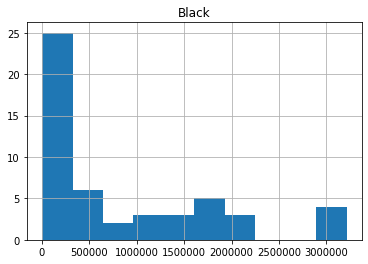

In [44]:
histo.hist(column='Black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017EC4B6D408>]],
      dtype=object)

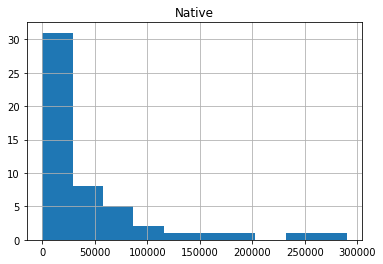

In [45]:
histo.hist(column='Native')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017EC4B9CE48>]],
      dtype=object)

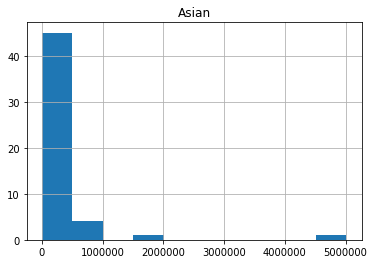

In [46]:
histo.hist(column='Asian')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017EC4C05AC8>]],
      dtype=object)

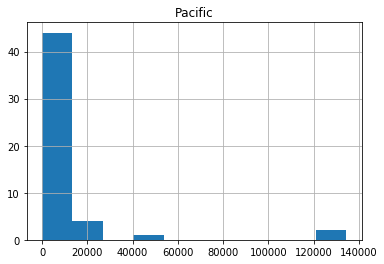

In [47]:
histo.hist(column='Pacific')